In [5]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import numpy as np
import pandas as pd

In [3]:
# Load the dataset
file_path = '/content/drive/MyDrive/Colab Notebooks/notebook/5002 final/Data_Q6-20231214T121642Z-001/Data_Q6/Bank_Customer.csv'
bank_data = pd.read_csv(file_path)

# Display the first few rows of the dataframe
bank_data.head()

TransactionID CustomerID CustomerDateOfBirth CustGender CustLocation  \
0            T1   C5841053             10/1/94          F   JAMSHEDPUR   
1            T2   C2142763              4/4/57          M      JHAJJAR   
2            T3   C4417068            26/11/96          F       MUMBAI   
3            T4   C5342380             14/9/73          F       MUMBAI   
4            T5   C9031234             24/3/88          F  NAVI MUMBAI   

   CustAccountBalance TransactionDate  TransactionTime  \
0            17819.05       2002/8/16           143207   
1             2270.69       2002/8/16           141858   
2            17874.44       2002/8/16           142712   
3           866503.21       2002/8/16           142714   
4             6714.43       2002/8/16           181156   

   TransactionAmount (INR)  
0                     25.0  
1                  27999.0  
2                    459.0  
3                   2060.0  
4                   1762.5

In [4]:
# Convert date columns to datetime objects
bank_data['CustomerDateOfBirth'] = pd.to_datetime(bank_data['CustomerDateOfBirth'], errors='coerce')
bank_data['TransactionDate'] = pd.to_datetime(bank_data['TransactionDate'], errors='coerce')

In [5]:
bank_data[['CustomerDateOfBirth', 'TransactionDate']].head()

CustomerDateOfBirth TransactionDate
0          1994-10-01      2002-08-16
1          2057-04-04      2002-08-16
2          1996-11-26      2002-08-16
3          1973-09-14      2002-08-16
4          1988-03-24      2002-08-16

#Remove Outliers

In [ ]:
# # Assuming bank_data is your DataFrame
# # Define a reasonable date range
# start_date = pd.to_datetime('1943-12-15')  # Earliest reasonable birthdate
# end_date = pd.to_datetime('today')         # Latest reasonable birthdate (today)

# # Convert the 'CustomerDateOfBirth' column to datetime objects
# bank_data['CustomerDateOfBirth'] = pd.to_datetime(bank_data['CustomerDateOfBirth'], errors='coerce')

# # Replace dates outside the reasonable range with December 15, 1993
# replacement_date = pd.to_datetime('1993-12-15')  # Date to use for replacement
# bank_data.loc[(bank_data['CustomerDateOfBirth'] < start_date) |
#               (bank_data['CustomerDateOfBirth'] > end_date), 'CustomerDateOfBirth'] = replacement_date

In [6]:
# Assuming bank_data is your DataFrame
# Define a reasonable date range
start_date = pd.to_datetime('1943-12-15')  # Earliest reasonable birthdate
end_date = pd.to_datetime('today')         # Latest reasonable birthdate (today)

# Convert the 'CustomerDateOfBirth' column to datetime objects
bank_data['CustomerDateOfBirth'] = pd.to_datetime(bank_data['CustomerDateOfBirth'], errors='coerce')

# Calculate the mean and standard deviation of valid birthdates
valid_birthdates = bank_data[(bank_data['CustomerDateOfBirth'] >= start_date) &
                             (bank_data['CustomerDateOfBirth'] <= end_date)]
mean_birthdate = valid_birthdates['CustomerDateOfBirth'].mean().timestamp()  # Convert to timestamp
std_birthdate = valid_birthdates['CustomerDateOfBirth'].std().total_seconds()  # Convert to seconds

# Generate random birthdates following a normal distribution
num_outliers = len(bank_data[(bank_data['CustomerDateOfBirth'] < start_date) |
                            (bank_data['CustomerDateOfBirth'] > end_date)])
random_birthdate_timestamps = np.random.normal(loc=mean_birthdate, scale=std_birthdate, size=num_outliers)
random_birthdates = pd.to_datetime(random_birthdate_timestamps, unit='s')  # Convert timestamps back to datetime

# Replace dates outside the reasonable range with random birthdates
bank_data.loc[(bank_data['CustomerDateOfBirth'] < start_date) |
              (bank_data['CustomerDateOfBirth'] > end_date), 'CustomerDateOfBirth'] = random_birthdates

# Ensure all birthdates are within the specified range
bank_data['CustomerDateOfBirth'] = np.clip(bank_data['CustomerDateOfBirth'], start_date, end_date)

In [7]:
# Directly remove outliers from the original DataFrame without renaming
bank_data.drop(bank_data[(bank_data['TransactionDate'].dt.year < 1943) | (bank_data['TransactionDate'] > pd.to_datetime('today'))].index, inplace=True)

# Verify if the outliers have been successfully removed from the original DataFrame
remaining_outliers_in_original_check = bank_data[(bank_data['TransactionDate'].dt.year < 1943) | (bank_data['TransactionDate'] > pd.to_datetime('today'))]
remaining_outliers_in_original_check.empty


True

In [8]:
# Add age column (assuming current year is 2023)
bank_data['Age'] = 2023 - bank_data['CustomerDateOfBirth'].dt.year

# Convert TransactionTime to a more usable format
bank_data['TransactionHour'] = bank_data['TransactionTime'] // 10000

# Remove rows where 'CustGender' column has the value 'T'
bank_data = bank_data[bank_data['CustGender'] != 'T']

In [9]:
# Assume bank_data is our DataFrame, and CustGender is one of its columns

# Define the allowed gender values
allowed_genders = ['M', 'F']

# Remove rows where the gender value is not in the allowed list
bank_data = bank_data[bank_data['CustGender'].isin(allowed_genders)]


In [10]:
bank_data[['CustGender']].head()

CustGender
0          F
1          M
2          F
3          F
4          F

Visualization

Text(0.5, 1.0, 'Age Distribution of Customers')

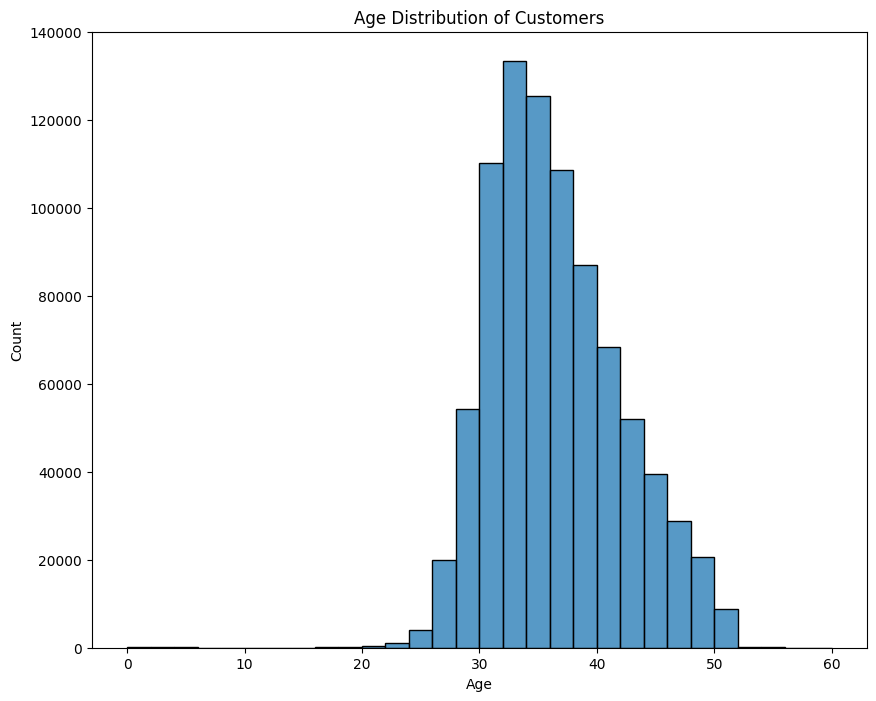

In [11]:
# Insights and visualizations
fig, ax = plt.subplots(figsize=(10, 8))  # Create a single subplot with a specified figure size

# Age distribution
sns.histplot(bank_data['Age'], bins=30, ax=ax)  # Plot a histogram of the 'Age' column with 30 bins
ax.set_title('Age Distribution of Customers')  # Set the title for the histogram


In [ ]:
bank_data['CustGender'].value_counts()

M    765530
F    281936
Name: CustGender, dtype: int64

Text(0.5, 1.0, 'Gender Distribution of Customers')

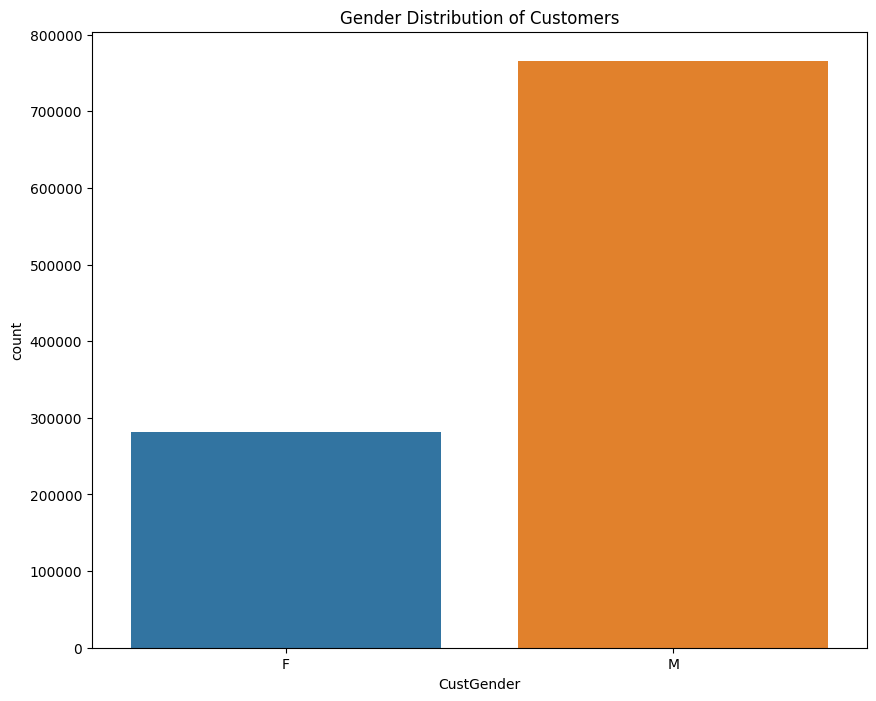

In [ ]:
# Assuming bank_data is a pandas DataFrame containing the 'CustGender' column

fig, ax = plt.subplots(figsize=(10, 8))  # Create a subplot
sns.countplot(x='CustGender', data=bank_data, ax=ax)  # Use ax for the bar plot
ax.set_title('Gender Distribution of Customers')  # Set the title

In [ ]:
bank_data['CustAccountBalance'].value_counts()

0.00         2711
45856.24      538
27021.05      514
10238.63      401
0.01          300
             ... 
20197.82        1
229980.34       1
19036.00        1
10159.97        1
1002.96         1
Name: CustAccountBalance, Length: 161327, dtype: int64

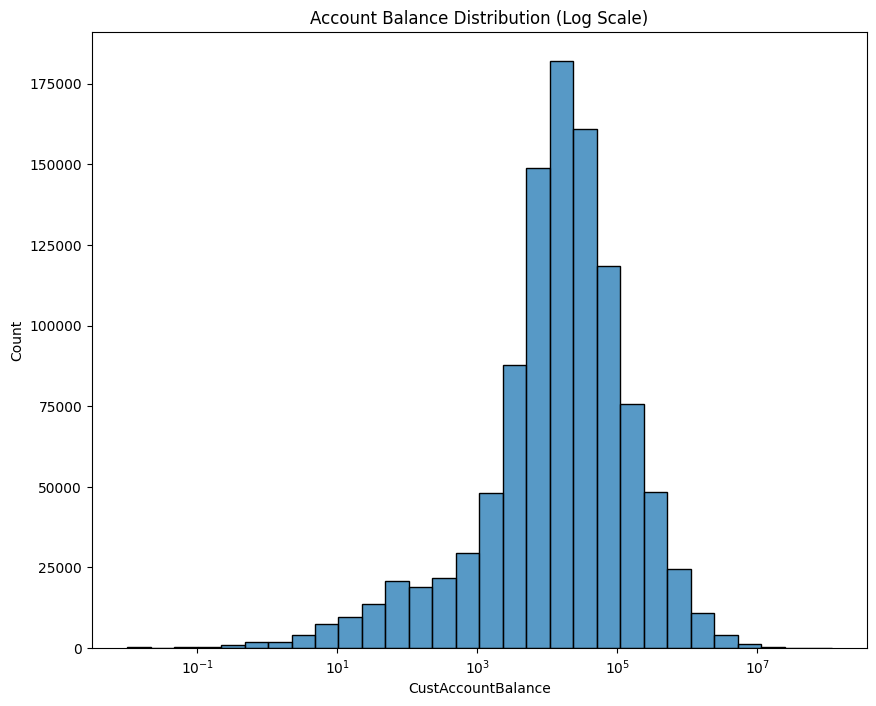

In [ ]:
# Remove zero and negative values from 'CustAccountBalance'
# This step is necessary because logarithmic scale can only be applied to positive values
filtered_data = bank_data[bank_data['CustAccountBalance'] > 0]

# Create a single subplot
fig, ax = plt.subplots(figsize=(10, 8))  # Create a subplot with specified figure size

# Plot a histogram of 'CustAccountBalance' using logarithmic scale
# Logarithmic scale helps in dealing with wide-ranging values by compressing scales
sns.histplot(filtered_data['CustAccountBalance'], bins=30, log_scale=True, ax=ax)

# Set the title for the plot
ax.set_title('Account Balance Distribution (Log Scale)')  # Set the title for the plot

# Display the plot
plt.show()  # Show the plot

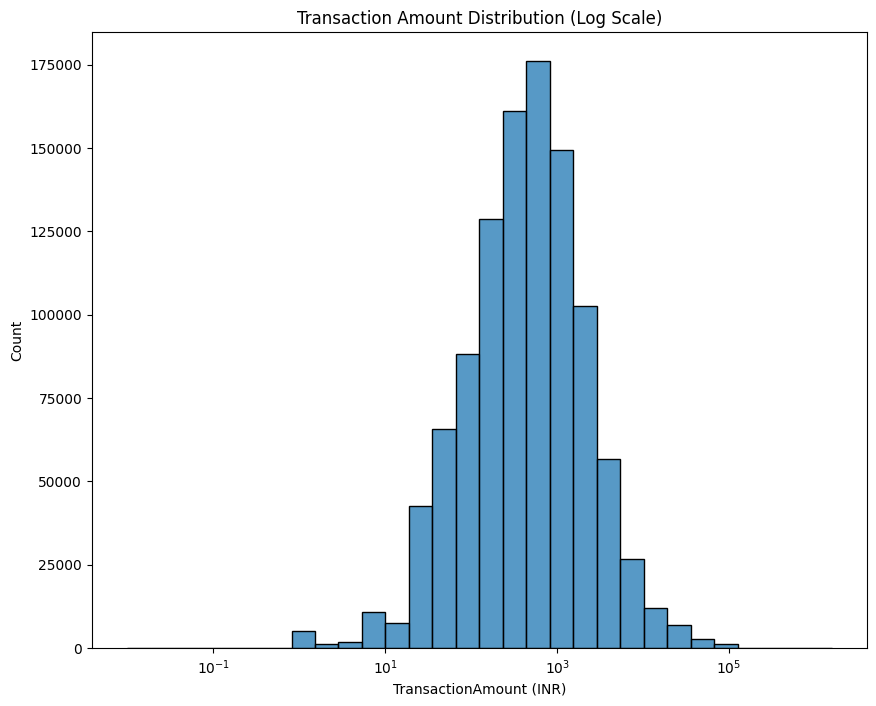

In [ ]:
# Create a single subplot
fig, ax = plt.subplots(figsize=(10, 8))

# Remove zero and negative values from 'TransactionAmount (INR)'
filtered_data = bank_data[bank_data['TransactionAmount (INR)'] > 0]

# Plot a histogram of 'TransactionAmount (INR)'
sns.histplot(filtered_data['TransactionAmount (INR)'], bins=30, log_scale=True, ax=ax)

# Set the title for the plot
ax.set_title('Transaction Amount Distribution (Log Scale)')

# Display the plot
plt.show()

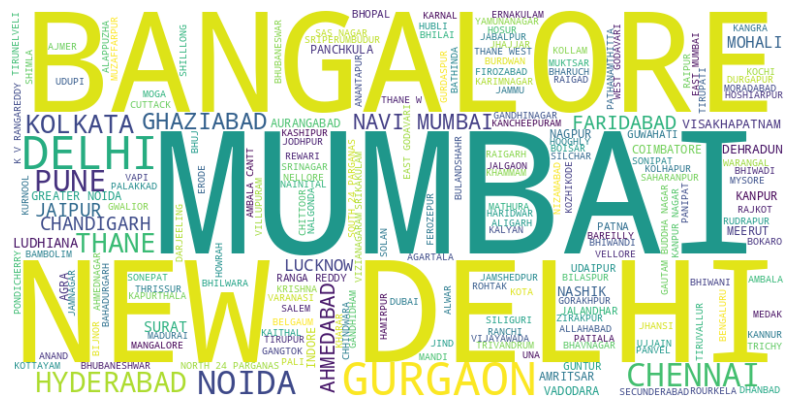

In [ ]:
from wordcloud import WordCloud

# Calculate the number of transactions for each location
location_counts = bank_data['CustLocation'].value_counts()

# Create a WordCloud object
wordcloud = WordCloud(width=800, height=400, background_color ='white')  # Initialize a WordCloud object with specified dimensions and background color

# Generate a word cloud
wordcloud.generate_from_frequencies(location_counts)  # Generate the word cloud using location frequencies

# Display the word cloud
plt.figure(figsize=(10, 8))  # Set the size of the figure containing the word cloud
plt.imshow(wordcloud, interpolation='bilinear')  # Display the word cloud using bilinear interpolation for smoothing
plt.axis('off')  # Turn off the axis labels
plt.show()  # Show the plot

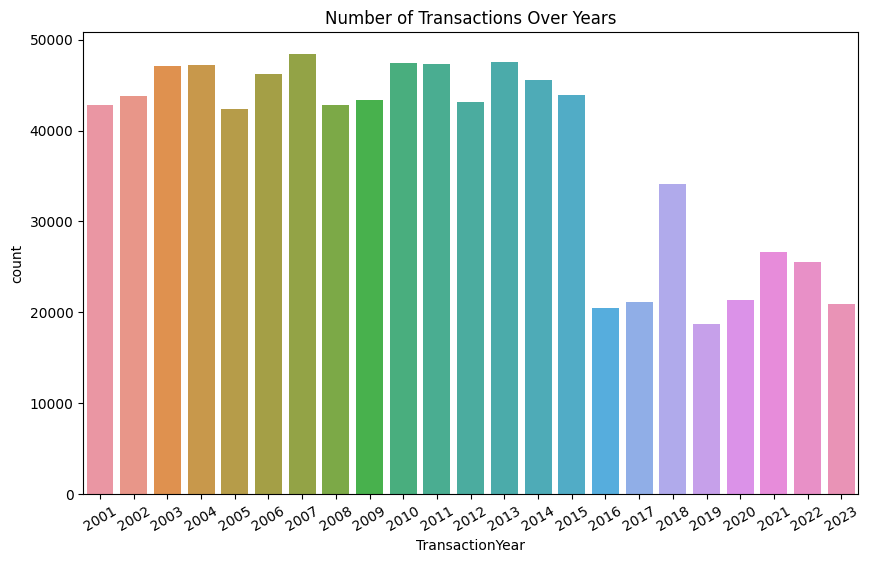

In [ ]:
# Adding a column to represent the transaction year
bank_data['TransactionYear'] = bank_data['TransactionDate'].dt.year

# Creating a single subplot
plt.figure(figsize=(10, 6))
sns.countplot(x='TransactionYear', data=bank_data)
plt.title('Number of Transactions Over Years')
plt.xticks(rotation=30)  # Rotate the x-axis labels
plt.show()

Text(0.5, 1.0, 'Transaction Hour Distribution')

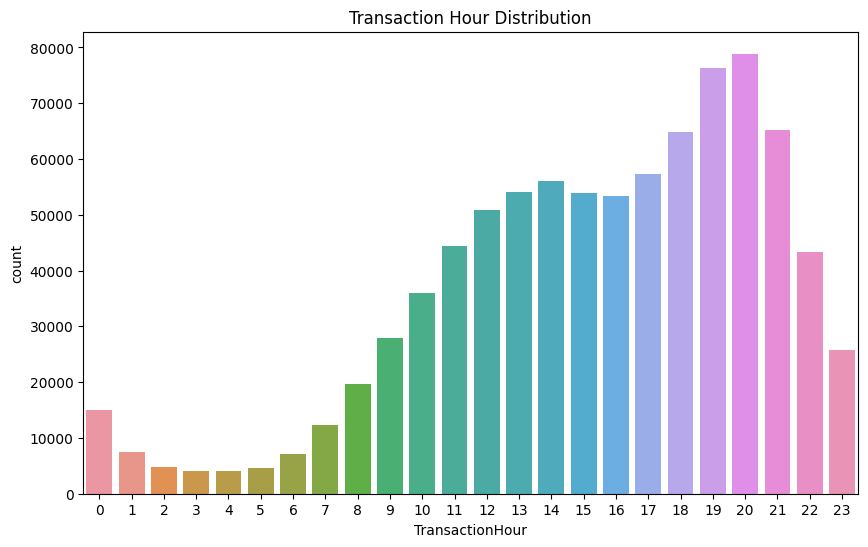

In [ ]:
# Transaction hour distribution
plt.figure(figsize=(10, 6))
sns.countplot(x='TransactionHour', data=bank_data)
plt.title('Transaction Hour Distribution')

Text(0.5, 1.0, 'Age vs Account Balance')

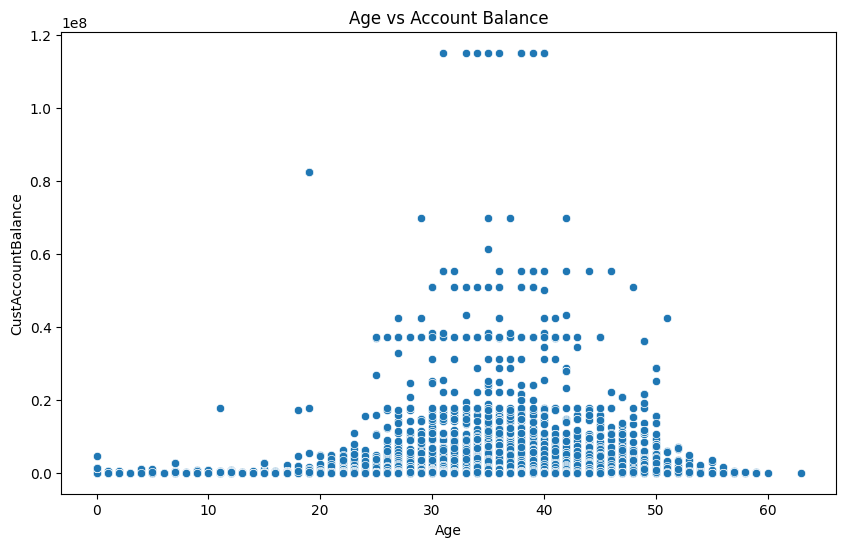

In [ ]:
# Relationship between age and account balance
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Age', y='CustAccountBalance', data=bank_data)
plt.title('Age vs Account Balance')

In [ ]:
# Relationship between transaction amount and account balance
plt.figure(figsize=(10, 6))
sns.scatterplot(x='TransactionAmount (INR)', y='CustAccountBalance', data=bank_data)
plt.title('Transaction Amount vs Account Balance')

Text(0.5, 1.0, 'Transaction Amount vs Account Balance')

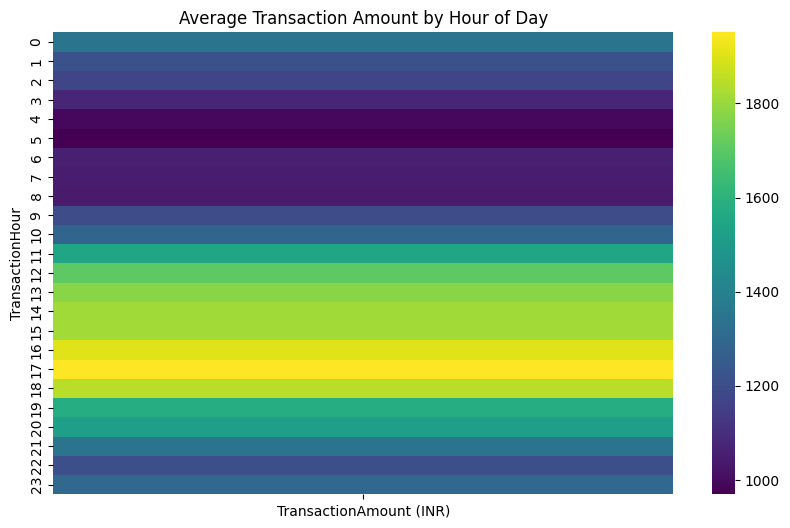

In [ ]:
plt.figure(figsize=(10, 6))
# First, extract the hour from the TransactionTime
bank_data['TransactionHour'] = bank_data['TransactionTime'] // 10000

# Create a pivot table for the heatmap
pivot_table = bank_data.pivot_table(values='TransactionAmount (INR)', index='TransactionHour', aggfunc='mean')

sns.heatmap(pivot_table, cmap='viridis')
plt.title('Average Transaction Amount by Hour of Day')
plt.show()

In [ ]:
plt.figure(figsize=(10, 6))

# Convert TransactionDate to datetime
bank_data['TransactionDate'] = pd.to_datetime(bank_data['TransactionDate'])

# Group by year and calculate average balance
bank_data['Year'] = bank_data['TransactionDate'].dt.year
avg_balance_per_year = bank_data.groupby('Year')['CustAccountBalance'].mean()

sns.lineplot(x=avg_balance_per_year.index, y=avg_balance_per_year)
plt.title('Average Account Balance Over Years')
plt.xlabel('Year')
plt.ylabel('Average Account Balance')
plt.show()

Clustering

In [1]:
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.metrics import silhouette_score
from datetime import datetime
from sklearn.impute import SimpleImputer
from sklearn.decomposition import TruncatedSVD
from sklearn.utils import resample
import matplotlib.pyplot as plt
import seaborn as sns

In [13]:
# Encode categorical variables
label_encoder = LabelEncoder()
bank_data['CustGender'] = label_encoder.fit_transform(bank_data['CustGender'])
bank_data['CustLocation'] = label_encoder.fit_transform(bank_data['CustLocation'])

# Ensure CustomerDateOfBirth is of Timestamp type
bank_data['CustomerDateOfBirth'] = pd.to_datetime(bank_data['CustomerDateOfBirth'])

# Calculate age
current_year = datetime.now().year
bank_data['Age'] = current_year - bank_data['CustomerDateOfBirth'].dt.year

# Select relevant features for clustering
features = ['Age', 'CustGender', 'CustLocation', 'CustAccountBalance', 'TransactionAmount (INR)']
X = bank_data[features]

# Fill missing values for numeric features
for column in ['Age', 'CustAccountBalance', 'TransactionAmount (INR)']:
    X[column] = X[column].fillna(X[column].mean())

# Fill missing values for categorical features
for column in ['CustGender', 'CustLocation']:
    X[column] = X[column].fillna(X[column].mode().iloc[0])

# Data standardization
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

<ipython-input-13-72f1a1015416>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[column] = X[column].fillna(X[column].mean())
<ipython-input-13-72f1a1015416>:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[column] = X[column].fillna(X[column].mode().iloc[0])
<ipython-input-13-72f1a1015416>:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.o

In [ ]:
# Encode categorical variables
label_encoder = LabelEncoder()
bank_data['CustGender'] = label_encoder.fit_transform(bank_data['CustGender'])
bank_data['CustLocation'] = label_encoder.fit_transform(bank_data['CustLocation'])

# Ensure CustomerDateOfBirth is of Timestamp type
bank_data['CustomerDateOfBirth'] = pd.to_datetime(bank_data['CustomerDateOfBirth'])

# Calculate age
current_year = datetime.now().year
bank_data['Age'] = current_year - bank_data['CustomerDateOfBirth'].dt.year

# Select relevant features for clustering
features = ['Age', 'CustGender', 'CustLocation', 'CustAccountBalance', 'TransactionAmount (INR)']
X = bank_data[features]

# Fill missing values for numeric features
for column in ['Age', 'CustAccountBalance', 'TransactionAmount (INR)']:
    X[column] = X[column].fillna(X[column].mean())

# Fill missing values for categorical features
for column in ['CustGender', 'CustLocation']:
    if not X[column].mode().empty:
        X[column] = X[column].fillna(X[column].mode().iloc[0])
    else:

        X = X.dropna(subset=[column])


# Data standardization
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [14]:
print(X.isnull().sum())


Age                        0
CustGender                 0
CustLocation               0
CustAccountBalance         0
TransactionAmount (INR)    0
dtype: int64


In [ ]:
# Applying clustering algorithms
# K-Means
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans_clusters = kmeans.fit_predict(X_scaled)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
bank_data['KMeans_Cluster'] = kmeans_clusters

kmeans_stats = bank_data.groupby('KMeans_Cluster')[features].mean()

In [ ]:
kmeans_stats

Age  CustGender  CustLocation  CustAccountBalance  \
KMeans_Cluster                                                            
0               35.450465         0.0   3830.153566       106411.368727   
1               36.426536         1.0   5925.814688       135899.788711   
2               35.994509         1.0   1969.517727        94487.424096   

                TransactionAmount (INR)  
KMeans_Cluster                           
0                           1670.745126  
1                           1699.262079  
2                           1399.203612

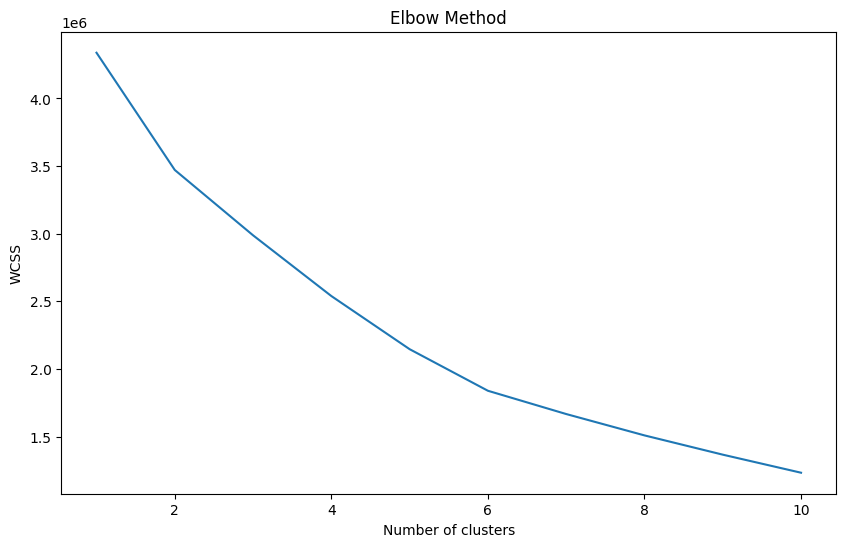

In [ ]:
# Using the Elbow method to determine the optimal number of clusters
wcss = []  # Within-cluster sum of squares
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', n_init=10, random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

# Plot the Elbow graph
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS (Within-cluster Sum of Squares)')
plt.show()

In [ ]:
# List for storing silhouette coefficients
silhouette_coefficients = []

# Using the first 1000 samples of the dataset
x_subset = X_scaled[:1000]

# Note: We start from 2 clusters as silhouette score doesn't make sense for a single cluster
for k in range(2, 11):
    # Initialize KMeans with k clusters
    kmeans = KMeans(n_clusters=k, init='k-means++', n_init=10, random_state=42)
    # Fit the model on the subset of data
    kmeans.fit(x_subset)
    # Calculate the silhouette score and append it to the list
    score = silhouette_score(x_subset, kmeans.labels_)
    silhouette_coefficients.append(score)

# Plot the silhouette coefficients
plt.figure(figsize=(10, 6))
plt.plot(range(2, 11), silhouette_coefficients)
plt.xticks(range(2, 11))
plt.title('Silhouette Coefficients for Different Numbers of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Coefficient')
plt.show()



In [ ]:
111111111

全数据集

In [ ]:
from scipy import stats

# Colors for plotting
colo = ['b', 'g', 'r', 'c', 'm', 'y', 'k']

# Using a subset (first 1000 samples) of preprocessed and standardized data
x_subset = X_scaled[:100000]

# Calculate Z-scores
z_scores = np.abs(stats.zscore(x_subset))
threshold = 3  # Typically a threshold of 3 is used for outlier detection
# Remove outliers
x_no_outliers = x_subset[(z_scores < threshold).all(axis=1)]

fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

sse = []
score = []
K = 3  # Split into K clusters
clf = KMeans(n_clusters=K, n_init=10)
clf.fit(x_no_outliers)
sse.append(clf.inertia_)
labels = clf.predict(x_no_outliers)
score.append(silhouette_score(x_no_outliers, labels, metric='euclidean'))

# Plot the clustering result
for i in range(x_no_outliers.shape[0]):
    ax.scatter(x_no_outliers[i, 0], x_no_outliers[i, 1], x_no_outliers[i, 2], c=colo[labels[i]])

ax.set_xlabel('Feature 1')
ax.set_ylabel('Feature 2')
ax.set_zlabel('Feature 3')
plt.title('K-Means Clustering with K=' + str(K))
plt.show()


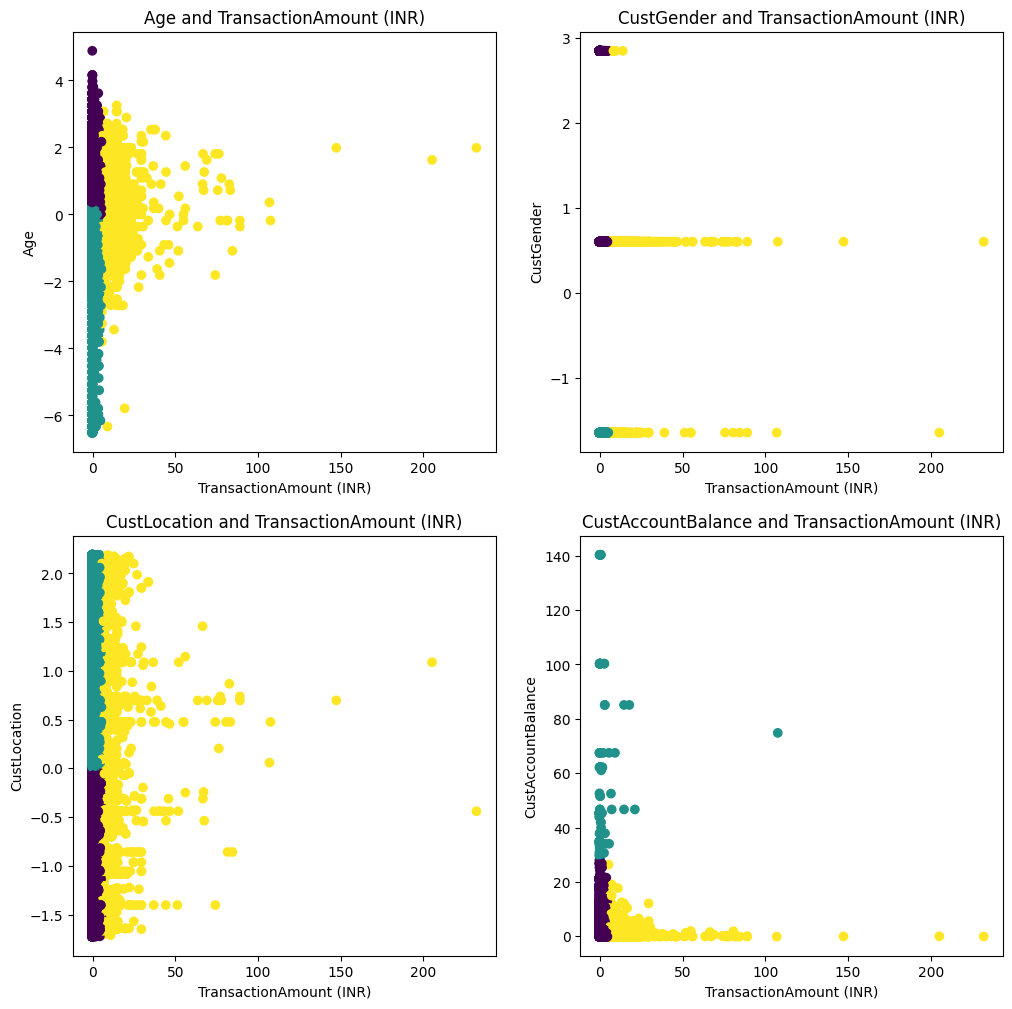

In [ ]:
# Define the list of features for clustering
features = ['Age', 'CustGender', 'CustLocation', 'CustAccountBalance']
transaction_amount_index = 4  # Assuming 'TransactionAmount (INR)' is at the 5th position in X_scaled

# Set K-Means parameters
K = 3
clf = KMeans(n_clusters=K, n_init=10)

# Create subplots
fig, axs = plt.subplots(2, 2, figsize=(12, 12))

# Cluster each feature against 'TransactionAmount (INR)'
for i, feature in enumerate(features):
    # Find the index of the current feature in X_scaled
    feature_index = X.columns.tolist().index(feature)

    # Extract the data for 'TransactionAmount (INR)' and the current feature
    x_pair = X_scaled[:, [transaction_amount_index, feature_index]]

    # Apply K-Means clustering
    clf.fit(x_pair)
    labels = clf.predict(x_pair)

    # Plot the subplot
    ax = axs[i // 2, i % 2]
    ax.scatter(x_pair[:, 0], x_pair[:, 1], c=labels)
    ax.set_xlabel('TransactionAmount (INR)')
    ax.set_ylabel(feature)
    ax.set_title(f'{feature} and TransactionAmount (INR)')

plt.show()




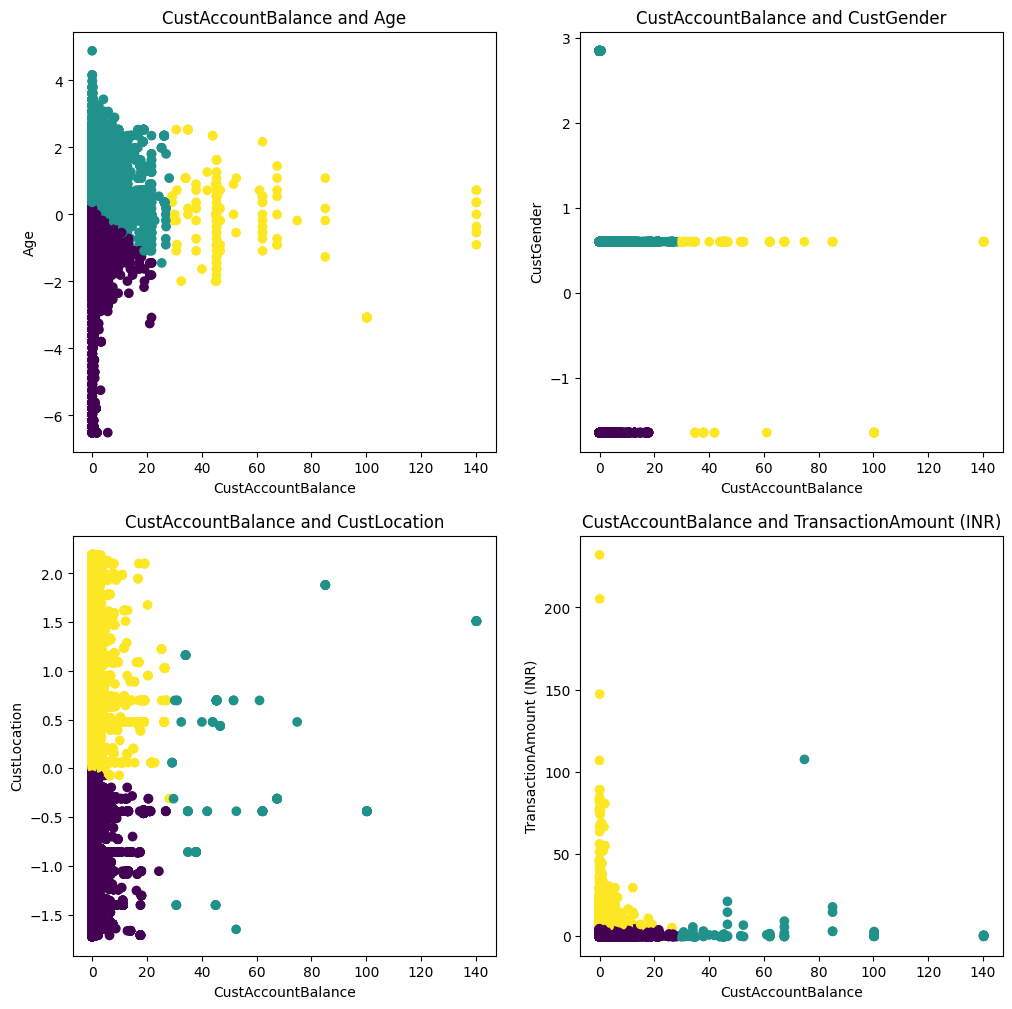

In [ ]:
# Define a list of features for clustering
features = ['Age', 'CustGender', 'CustLocation', 'TransactionAmount (INR)']
cust_account_balance_index = 3  # Assuming 'CustAccountBalance' is at the 4th position in X_scaled

# Set the parameters for K-Means clustering
K = 3
clf = KMeans(n_clusters=K, n_init=10)

# Create subplots
fig, axs = plt.subplots(2, 2, figsize=(12, 12))

# Perform clustering for 'CustAccountBalance' against each of the other features
for i, feature in enumerate(features):
    # Find the index of the current feature in X_scaled
    feature_index = X.columns.tolist().index(feature)

    # Extract the data for 'CustAccountBalance' and the current feature
    x_pair = X_scaled[:, [cust_account_balance_index, feature_index]]

    # Apply K-Means clustering to the pair of features
    clf.fit(x_pair)
    labels = clf.predict(x_pair)

    # Plot the results in a subplot
    ax = axs[i // 2, i % 2]
    ax.scatter(x_pair[:, 0], x_pair[:, 1], c=labels)
    ax.set_xlabel('CustAccountBalance')
    ax.set_ylabel(feature)
    ax.set_title(f'CustAccountBalance and {feature}')

# Display the plots
plt.show()



In [ ]:
from scipy import stats
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [ ]:
# features = ['Age', 'CustGender', 'CustLocation', 'CustAccountBalance', 'TransactionAmount (INR)']

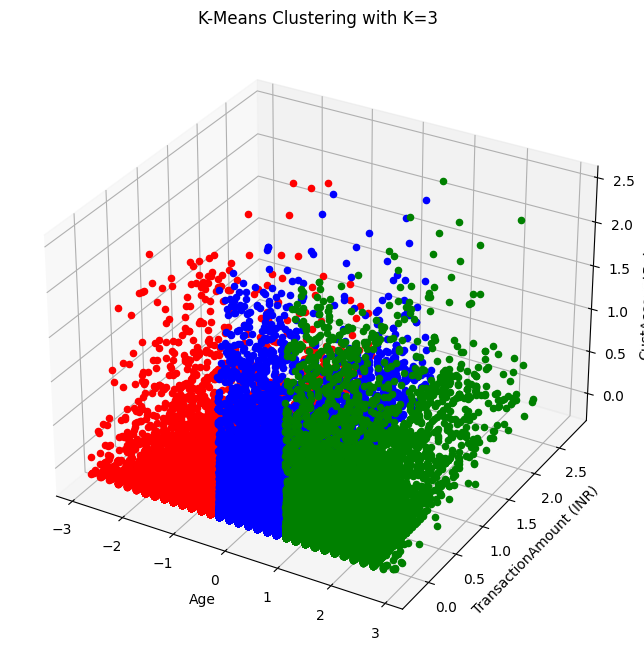

In [ ]:

# Colors for plotting
colo = ['b', 'g', 'r', 'c', 'm', 'y', 'k']

# Using a subset (first 1000 samples) of preprocessed and standardized data
x_subset = X_scaled[:100000]

# Calculate Z-scores
z_scores = np.abs(stats.zscore(x_subset))
threshold = 3  # Typically a threshold of 3 is used for outlier detection
# Remove outliers
x_no_outliers = x_subset[(z_scores < threshold).all(axis=1)]

# Assuming the indexes for 'Age', 'TransactionAmount (INR)', and 'CustAccountBalance' are 0, 4, and 3 respectively
age_index = 0
transaction_amount_index = 4
cust_account_balance_index = 3

# Replace 'Feature 1', 'Feature 2', 'Feature 3' with 'CustGender', 'TransactionAmount (INR)', 'CustAccountBalance'
x_no_outliers = x_no_outliers[:, [age_index, transaction_amount_index, cust_account_balance_index]]

fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

sse = []
score = []
K = 3  # Split into K clusters
clf = KMeans(n_clusters=K, n_init=10)
clf.fit(x_no_outliers)
sse.append(clf.inertia_)
labels = clf.predict(x_no_outliers)
score.append(silhouette_score(x_no_outliers, labels, metric='euclidean'))

# Plot the clustering result
for i in range(x_no_outliers.shape[0]):
    ax.scatter(x_no_outliers[i, 0], x_no_outliers[i, 1], x_no_outliers[i, 2], c=colo[labels[i]])

ax.set_xlabel('Age')
ax.set_ylabel('TransactionAmount (INR)')
ax.set_zlabel('CustAccountBalance')
plt.title('K-Means Clustering with K=' + str(K))
plt.show()



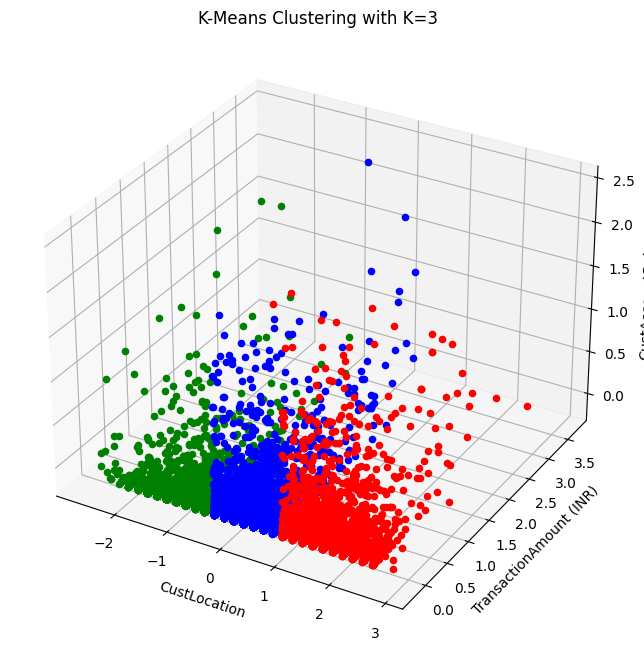

In [ ]:

# Colors for plotting
colo = ['b', 'g', 'r', 'c', 'm', 'y', 'k']

# Using a subset (first 1000 samples) of preprocessed and standardized data
x_subset = X_scaled[:10000]

# Calculate Z-scores
z_scores = np.abs(stats.zscore(x_subset))
threshold = 3  # Typically a threshold of 3 is used for outlier detection
# Remove outliers
x_no_outliers = x_subset[(z_scores < threshold).all(axis=1)]

# Assuming the indexes for 'CustLocation', 'TransactionAmount (INR)', and 'CustAccountBalance' are 2, 4, and 3 respectively
cust_location_index = 0
transaction_amount_index = 4
cust_account_balance_index = 3

# Replace 'Feature 1', 'Feature 2', 'Feature 3' with 'CustGender', 'TransactionAmount (INR)', 'CustAccountBalance'
x_no_outliers = x_no_outliers[:, [cust_location_index, transaction_amount_index, cust_account_balance_index]]

fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

sse = []
score = []
K = 3  # Split into K clusters
clf = KMeans(n_clusters=K, n_init=10)
clf.fit(x_no_outliers)
sse.append(clf.inertia_)
labels = clf.predict(x_no_outliers)
score.append(silhouette_score(x_no_outliers, labels, metric='euclidean'))

# Plot the clustering result
for i in range(x_no_outliers.shape[0]):
    ax.scatter(x_no_outliers[i, 0], x_no_outliers[i, 1], x_no_outliers[i, 2], c=colo[labels[i]])

ax.set_xlabel('CustLocation')
ax.set_ylabel('TransactionAmount (INR)')
ax.set_zlabel('CustAccountBalance')
plt.title('K-Means Clustering with K=' + str(K))
plt.show()


In [15]:
from datetime import datetime
from sklearn.preprocessing import LabelEncoder

# Calculate age from 'CustomerDateOfBirth'
current_year = datetime.now().year
bank_data['CustomerDateOfBirth'] = pd.to_datetime(bank_data['CustomerDateOfBirth'], errors='coerce')
bank_data['Age'] = current_year - bank_data['CustomerDateOfBirth'].dt.year

# Encode 'CustGender' and 'CustLocation'
label_encoder_gender = LabelEncoder()
bank_data['CustGender'] = label_encoder_gender.fit_transform(bank_data['CustGender'])

label_encoder_location = LabelEncoder()
bank_data['CustLocation'] = label_encoder_location.fit_transform(bank_data['CustLocation'])

# Selecting the relevant features
features = bank_data[['Age', 'CustGender', 'CustLocation', 'CustAccountBalance', 'TransactionAmount (INR)']]

# Checking for missing values
features.isnull().sum(), features.head()


(Age                        2649
 CustGender                    0
 CustLocation                  0
 CustAccountBalance         2008
 TransactionAmount (INR)       0
 dtype: int64,
     Age  CustGender  CustLocation  CustAccountBalance  TransactionAmount (INR)
 0  29.0           0          3398            17819.05                     25.0
 1  33.0           1          3455             2270.69                  27999.0
 2  27.0           0          5002            17874.44                    459.0
 3  50.0           0          5002           866503.21                   2060.0
 4  35.0           0          5373             6714.43                   1762.5)

In [6]:
# Load the dataset
file_path = '/content/drive/MyDrive/Colab Notebooks/notebook/5002 final/Data_Q6-20231214T121642Z-001/Data_Q6/Bank_Customer.csv'
bank_data = pd.read_csv(file_path)

# Convert date columns to datetime objects and calculate age
bank_data['CustomerDateOfBirth'] = pd.to_datetime(
    bank_data['CustomerDateOfBirth'], format='%d/%m/%y', errors='coerce')
bank_data['TransactionDate'] = pd.to_datetime(
    bank_data['TransactionDate'], format='%Y/%m/%d', errors='coerce')
current_date = datetime.now()
bank_data['CustAge'] = bank_data['CustomerDateOfBirth'].apply(
    lambda x: current_date.year - x.year - ((current_date.month, current_date.day) < (x.month, x.day))
    if pd.notnull(x) else np.nan)

# Filter out negative ages and handle gender categories
bank_data = bank_data[bank_data['CustAge'] >= 0]
bank_data = bank_data[bank_data['CustGender'].isin(['F', 'M'])]

# Encoding categorical variables
bank_data = pd.get_dummies(bank_data, columns=['CustGender', 'CustLocation'])

# Drop identifier columns
bank_data.drop(['TransactionID', 'CustomerID'], axis=1, inplace=True)

# Log transformation for account balance and transaction amount
bank_data['LogCustAccountBalance'] = np.log(bank_data['CustAccountBalance'] + 1)
bank_data['LogTransactionAmount'] = np.log(bank_data['TransactionAmount (INR)'] + 1)

# Drop original columns that have been log-transformed or aren't needed
bank_data.drop(['CustAccountBalance', 'TransactionAmount (INR)', 'CustomerDateOfBirth', 'TransactionDate'],
               axis=1, inplace=True)

# Sampling the data if necessary
bank_data_sampled = resample(bank_data, n_samples=50000, random_state=42) \
    if len(bank_data) > 50000 else bank_data

# Imputation of missing values
imputer = SimpleImputer(strategy='mean')
bank_data_sampled_imputed = imputer.fit_transform(bank_data_sampled)

# Feature standardization
scaler = StandardScaler()
X_scaled = scaler.fit_transform(bank_data_sampled_imputed)

# Dimensionality reduction for visualization
svd = TruncatedSVD(n_components=2)
X_svd = svd.fit_transform(X_scaled)

# Applying clustering algorithms
# K-Means clustering
kmeans = KMeans(n_clusters=2, random_state=42)
bank_data_sampled['Cluster_KMeans'] = kmeans.fit_predict(X_svd)

# Hierarchical clustering
hierarchical = AgglomerativeClustering(n_clusters=2)
bank_data_sampled['Cluster_Hierarchical'] = hierarchical.fit_predict(X_svd)

# DBSCAN clustering
dbscan = DBSCAN(eps=0.5, min_samples=5)
bank_data_sampled['Cluster_DBSCAN'] = dbscan.fit_predict(X_svd)

# Function to visualize clusters
def plot_clusters(pca_components, labels, title):
    plt.figure(figsize=(10, 6))
    plt.scatter(pca_components[:, 0], pca_components[:, 1], c=labels, cmap='viridis', marker='o')
    plt.title(title)
    plt.xlabel('SVD Component 1')
    plt.ylabel('SVD Component 2')
    plt.colorbar()
    plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [8]:
plot_clusters(X_svd, bank_data_sampled['Cluster_Hierarchical'], 'Hierarchical Clusters')

In [9]:
plot_clusters(X_svd, bank_data_sampled['Cluster_DBSCAN'], 'DBSCAN Clusters')